In [1]:
# import models and test data
from undershot_calcs import underTurbine
from river_class import river_obj
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')
data_df.head()


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6


In [3]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity)

# create a breastshot turbine object - with values from data sheet
b_radius = 0.585
b_width = 1.008
b_num_blades = 6
b_xcentre = 0.5
b_ycentre = 0.5

b_turbine = breastTurbine(b_radius, b_width, b_num_blades, b_xcentre, b_ycentre, river)

/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:175: RuntimeWarning: invalid value encountered in double_scalars
  flow_velocity = ((self.river.velocity)**2 + (self.g * fall_height * 2))**0.5


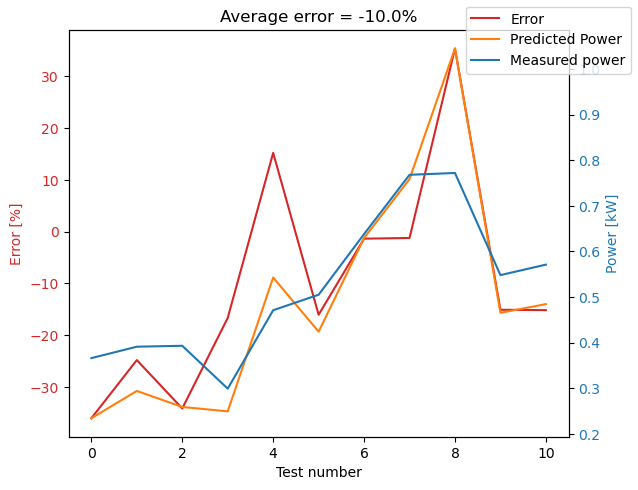

,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM],predicted power [kW],error
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2,0.234114,-36.034328
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3,0.294001,-24.807822
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8,0.258809,-34.145387
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2,0.249175,-16.664000
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6,0.542642,15.210682
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4,0.423948,-16.049873
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9,0.629330,-1.358972
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7,0.758582,-1.226275
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4,1.045033,35.366970
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9,0.465316,-15.088388


In [4]:
'''
For each row in the test data, calculate the power output of the turbine with the given inputs
add that result to the column 'predicted power'

'''

# create empty list to store predicted power values
predicted_power = []

# iterate through each row in the test data
for index, row in data_df.iterrows():
    # calculate the power output of the turbine
    b_turbine.analysis(row['x centre [m]'], row['y centre [m]'], row['Turbine rotational speed [RPM]'])
    # append the power output to the list
    predicted_power.append(b_turbine.avg_power / 1000)

# add the predicted power to the test data
data_df['predicted power [kW]'] = predicted_power

# calculate the error percentage between the predicted power and the measured power
data_df['error'] = (data_df['predicted power [kW]'] - data_df['Output power [kW]']) / data_df['Output power [kW]'] * 100

# plot the error on left axis and the predicted and measured power on the right axis
fig, ax1 = plt.subplots()
ax1.plot(data_df['error'], color='tab:red')
ax1.set_xlabel('Test number')
ax1.set_ylabel('Error [%]', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_df['predicted power [kW]'], color='tab:orange')
ax2.plot(data_df['Output power [kW]'], color='tab:blue')
ax2.set_ylabel('Power [kW]', color='tab:blue')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(['Error', 'Predicted Power','Measured power'])

# set the title to the average error
plt.title('Average error = ' + str(round(data_df['error'].mean(), 2)) + '%')

plt.show()

# print the test data
data_df

To improve the model, the model will be fitted a little more to the model.

Idea:
Introduce weights to some of the internal calculations that are updated by a function of the error for each position.

Implementation:
Similar idea to the perceptron algorithm where weights are updated on each position and algorithm attempts to converge.

What variables?
Simple: introduce weightings to inputs for x_centre, y_centre

In [5]:
# define starting hyperparameters
x_hyp = 1
y_hyp = 1
RPM_hyp = 1

import numpy as np

# implement perceptron type learning algorithm
for i in range(100):
    error = []
    # calculate the predicted power for each row in the test data
    for index, row in data_df.iterrows():
        b_turbine.analysis(row['x centre [m]'] * x_hyp, row['y centre [m]'] * y_hyp, row['Turbine rotational speed [RPM]'] * RPM_hyp)
        predicted_power = (b_turbine.avg_power / 1000)
        # print(index)

        # calculate the error between the predicted power and the measured power
        error.append(predicted_power - row['Output power [kW]']) 

        # if the error is positive, increase the hyperparameter
        if error[-1] > 0:
            if row['x centre [m]'] > 0:
                x_hyp += 0.001
            else:
                x_hyp -= 0.001

            if row['y centre [m]'] > 0:
                y_hyp += 0.001
            else:
                y_hyp -= 0.001

        # if the error is negative, decrease the hyperparameter
        elif error[-1] < 0:
            if row['x centre [m]'] > 0:
                x_hyp -= 0.001
            else:
                x_hyp += 0.001

            if row['y centre [m]'] > 0:
                y_hyp -= 0.001
            else:
                y_hyp += 0.001


        # if the error is less than 0.1 for all rows, break the loop
        if np.array(error).all() < 0.1:
            break
        
        

    # print the hyperparameters and error for each row
    if i // 10 == 0:
        # print(i, x_hyp, y_hyp, RPM_hyp, error)
        print('', end='')

    
    
# print the final hyperparameters
print('x_hyp =', x_hyp)
print('y_hyp =', y_hyp)
print('RPM_hyp =', RPM_hyp)




/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:175: RuntimeWarning: invalid value encountered in double_scalars
  flow_velocity = ((self.river.velocity)**2 + (self.g * fall_height * 2))**0.5


x_hyp = 0.5939999999999996
y_hyp = 1.0859999999999905
RPM_hyp = 1


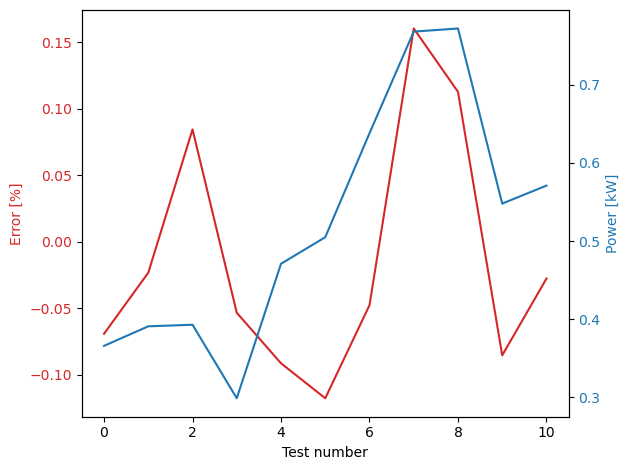

In [6]:
# create empty list to store predicted power values
predicted_power = []

# iterate through each row in the test data
for index, row in data_df.iterrows():
    # calculate the power output of the turbine
    b_turbine.analysis(row['x centre [m]'] * x_hyp, row['y centre [m]'] * y_hyp, row['Turbine rotational speed [RPM]'] * RPM_hyp)
    # append the power output to the list
    predicted_power.append(b_turbine.avg_power / 1000)

# add the predicted power to the test data
data_df['predicted power [kW]'] = predicted_power

# calculate the error percentage between the predicted power and the measured power
data_df['error'] = (data_df['predicted power [kW]'] - data_df['Output power [kW]']) / data_df['Output power [kW]'] * 100


# plot the new error on left axis and the predicted and measured power on the right axis
fig, ax1 = plt.subplots()
ax1.plot(error, color='tab:red')
ax1.set_xlabel('Test number')
ax1.set_ylabel('Error [%]', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_df['Output power [kW]'], color='tab:blue')
ax2.set_ylabel('Power [kW]', color='tab:blue')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped



So with this brief algorithm I have basically overfitted the data in such a way that completely minimises the error on the predicted power output to below +- 1% for all data points.

/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:175: RuntimeWarning: invalid value encountered in double_scalars
  flow_velocity = ((self.river.velocity)**2 + (self.g * fall_height * 2))**0.5


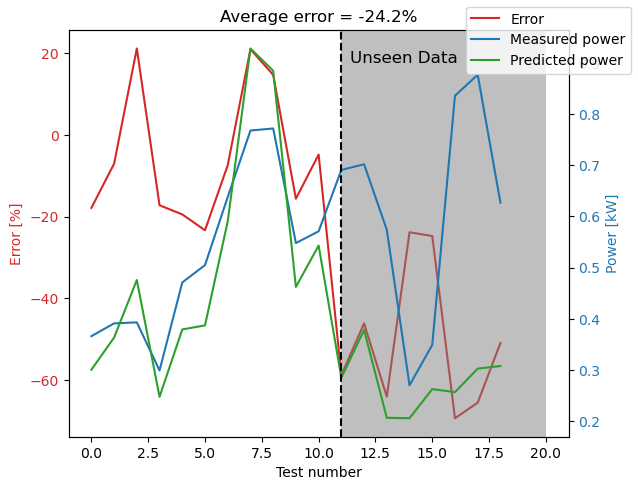

In [7]:
# import the extended test data
extra_data_df = pd.read_csv('Test Data/testDataMore.csv')

# create empty list to store predicted power values
predicted_power = []

# iterate through each row in the test data
for index, row in extra_data_df.iterrows():
    # calculate the power output of the turbine
    b_turbine.analysis(row['x centre [m]'] * x_hyp, row['y centre [m]'] * y_hyp, row['Turbine rotational speed [RPM]'] * RPM_hyp)
    # append the power output to the list
    predicted_power.append(b_turbine.avg_power / 1000)

# add the predicted power to the test data
extra_data_df['predicted power [kW]'] = predicted_power

# calculate the error percentage between the predicted power and the measured power
extra_data_df['error'] = (extra_data_df['predicted power [kW]'] - extra_data_df['Output power [kW]']) / extra_data_df['Output power [kW]'] * 100

# plot the new error on left axis and the predicted and measured power on the right axis
fig, ax1 = plt.subplots()
ax1.plot(extra_data_df['error'], color='tab:red')
ax1.set_xlabel('Test number')
ax1.set_ylabel('Error [%]', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(extra_data_df['Output power [kW]'], color='tab:blue')
ax2.plot(extra_data_df['predicted power [kW]'], color='tab:green')
ax2.set_ylabel('Power [kW]', color='tab:blue')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# add a vertical line to show where the test data ends and the extended test data begins
plt.axvline(x=11, color='black', linestyle='--')

# shade the background of the extended test data
plt.axvspan(11, 20, facecolor='grey', alpha=0.5)

# add text to show where the test data ends and the extended test data begins
plt.text(11.4, 0.9, 'Unseen Data', color='black', fontsize=12)

fig.legend(['Error','Measured power', 'Predicted power'])

# set title to average error
plt.title('Average error = ' + str(round(extra_data_df['error'].mean(), 2)) + '%')

plt.show()




/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:175: RuntimeWarning: invalid value encountered in double_scalars
  flow_velocity = ((self.river.velocity)**2 + (self.g * fall_height * 2))**0.5


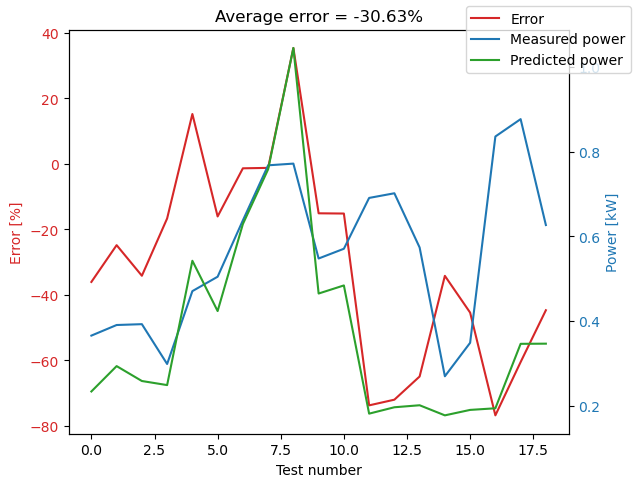

In [8]:
'''
Error from the extended test data is much higher than the error from the test data without the hyperparameter optimisation.
The hyperparameter optimisation still improves the error from the extended test data, but does not generalise well to unseen data.

'''


# re-import the extended test data
extra_data_df = pd.read_csv('Test Data/testDataMore.csv')

# create empty list to store predicted power values
predicted_power = []

# iterate through each row in the test data
for index, row in extra_data_df.iterrows():
    # calculate the power output of the turbine
    b_turbine.analysis(row['x centre [m]'] , row['y centre [m]'] , row['Turbine rotational speed [RPM]'] )
    # append the power output to the list
    predicted_power.append(b_turbine.avg_power / 1000)

# add the predicted power to the test data
extra_data_df['predicted power [kW]'] = predicted_power

# calculate the error percentage between the predicted power and the measured power
extra_data_df['error'] = (extra_data_df['predicted power [kW]'] - extra_data_df['Output power [kW]']) / extra_data_df['Output power [kW]'] * 100



# plot the results for the model without any hyperparameter tuning on the extended test data
fig, ax1 = plt.subplots()
ax1.plot(extra_data_df['error'], color='tab:red')
ax1.set_xlabel('Test number')
ax1.set_ylabel('Error [%]', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(extra_data_df['Output power [kW]'], color='tab:blue')
ax2.plot(extra_data_df['predicted power [kW]'], color='tab:green')
ax2.set_ylabel('Power [kW]', color='tab:blue')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(['Error','Measured power', 'Predicted power'])

# set title to average error
plt.title('Average error = ' + str(round(extra_data_df['error'].mean(), 2)) + '%')

plt.show()

